In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_1 = pd.read_csv(r"data\site_1_train_data.csv")
df_2 = pd.read_csv(r"data\site_1_train_data.csv")
df_3 = pd.read_csv(r"data\site_2_train_data.csv")
df_4 = pd.read_csv(r"data\site_3_train_data.csv")
df_5 = pd.read_csv(r"data\site_4_train_data.csv")
df_6 = pd.read_csv(r"data\site_5_train_data.csv")
df_7 = pd.read_csv(r"data\site_6_train_data.csv")

df_1["location"] = "Satyawati College"
df_2["location"] = "Indira Gandhi International Airport"
df_3["location"] = "Jawaharlal Nehru Stadium"
df_4["location"] = "Bawana Industrial Area"
df_5["location"] = "Okhla Phase III"
df_6["location"] = "Japanese Park Lake"
df_7["location"] = "Sonia Vihar"

df = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_6,df_7])

In [3]:
df.head()

,year,month,day,hour,O3_forecast,NO2_forecast,T_forecast,q_forecast,u_forecast,v_forecast,w_forecast,NO2_satellite,HCHO_satellite,ratio_satellite,O3_target,NO2_target,location
0,2022.0,7.0,28.0,0.0,73.35,57.54,22.99,7.68,-3.46,1.28,1.02,NaN,NaN,NaN,5.03,6.75,Satyawati College
1,2022.0,7.0,28.0,1.0,82.77,57.25,23.90,7.70,-1.35,0.29,0.99,NaN,NaN,NaN,5.08,6.07,Satyawati College
2,2022.0,7.0,28.0,2.0,92.19,56.97,23.89,7.72,0.76,-0.70,0.96,NaN,NaN,NaN,6.95,3.38,Satyawati College
3,2022.0,7.0,28.0,3.0,101.62,56.68,23.92,7.74,2.87,-1.69,0.93,NaN,NaN,NaN,5.80,4.85,Satyawati College
4,2022.0,7.0,28.0,4.0,113.51,64.06,25.55,7.81,2.45,-1.15,0.66,NaN,NaN,NaN,7.22,7.72,Satyawati College


In [4]:
df.shape

(199064, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199064 entries, 0 to 26352
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             199064 non-null  float64
 1   month            199064 non-null  float64
 2   day              199064 non-null  float64
 3   hour             199064 non-null  float64
 4   O3_forecast      199064 non-null  float64
 5   NO2_forecast     199064 non-null  float64
 6   T_forecast       199064 non-null  float64
 7   q_forecast       199064 non-null  float64
 8   u_forecast       199064 non-null  float64
 9   v_forecast       199064 non-null  float64
 10  w_forecast       199064 non-null  float64
 11  NO2_satellite    6524 non-null    float64
 12  HCHO_satellite   7160 non-null    float64
 13  ratio_satellite  6223 non-null    float64
 14  O3_target        199064 non-null  float64
 15  NO2_target       199064 non-null  float64
 16  location         199064 non-null  object 
dt

In [6]:
df.describe()

,year,month,day,hour,O3_forecast,NO2_forecast,T_forecast,q_forecast,u_forecast,v_forecast,w_forecast,NO2_satellite,HCHO_satellite,ratio_satellite,O3_target,NO2_target
count,199064.000000,199064.000000,199064.000000,199064.000000,199064.000000,199064.000000,199064.000000,199064.000000,199064.000000,199064.000000,199064.000000,6524.000000,7160.000000,6223.000000,199064.000000,199064.000000
mean,2021.526383,6.577503,15.726641,11.499538,68.778229,58.042005,23.974286,12.056386,0.378074,-0.500394,0.368315,0.836133,1.605383,0.849540,29.367413,39.899285
std,1.482523,3.464106,8.900953,6.922449,62.150779,43.888212,8.250294,5.457388,2.063479,1.319007,2.026612,0.669090,0.866590,2.089375,32.913150,30.821021
min,2019.000000,1.000000,1.000000,0.000000,0.000000,1.410000,1.950000,2.550000,-8.540000,-7.500000,-9.820000,0.020000,0.000000,0.040000,0.100000,0.100000
25%,2020.000000,4.000000,8.000000,5.000000,18.980000,21.757500,17.590000,7.480000,-1.130000,-1.490000,-1.060000,0.450000,1.000000,0.300000,5.750000,17.400000
50%,2022.000000,7.000000,16.000000,11.000000,47.130000,48.810000,25.640000,10.070000,0.650000,-0.630000,0.360000,0.650000,1.510000,0.450000,15.780000,31.120000
75%,2023.000000,10.000000,23.000000,17.000000,114.700000,84.340000,30.000000,17.370000,1.830000,0.460000,1.730000,0.950000,2.100000,0.780000,41.680000,53.920000
max,2024.000000,12.000000,31.000000,23.000000,524.310000,424.830000,45.710000,24.570000,8.560000,5.490000,9.170000,6.890000,8.180000,43.860000,199.900000,293.100000


In [7]:
df = df.drop(columns=["NO2_satellite","HCHO_satellite","ratio_satellite"])
df.head()

,year,month,day,hour,O3_forecast,NO2_forecast,T_forecast,q_forecast,u_forecast,v_forecast,w_forecast,O3_target,NO2_target,location
0,2022.0,7.0,28.0,0.0,73.35,57.54,22.99,7.68,-3.46,1.28,1.02,5.03,6.75,Satyawati College
1,2022.0,7.0,28.0,1.0,82.77,57.25,23.90,7.70,-1.35,0.29,0.99,5.08,6.07,Satyawati College
2,2022.0,7.0,28.0,2.0,92.19,56.97,23.89,7.72,0.76,-0.70,0.96,6.95,3.38,Satyawati College
3,2022.0,7.0,28.0,3.0,101.62,56.68,23.92,7.74,2.87,-1.69,0.93,5.80,4.85,Satyawati College
4,2022.0,7.0,28.0,4.0,113.51,64.06,25.55,7.81,2.45,-1.15,0.66,7.22,7.72,Satyawati College


In [8]:
for col in df.columns:
    print(col, "Min:", df[col].min(), "Max:", df[col].max())

year Min: 2019.0 Max: 2024.0
month Min: 1.0 Max: 12.0
day Min: 1.0 Max: 31.0
hour Min: 0.0 Max: 23.0
O3_forecast Min: 0.0 Max: 524.31
NO2_forecast Min: 1.41 Max: 424.83
T_forecast Min: 1.95 Max: 45.71
q_forecast Min: 2.55 Max: 24.57
u_forecast Min: -8.54 Max: 8.56
v_forecast Min: -7.5 Max: 5.49
w_forecast Min: -9.82 Max: 9.17
O3_target Min: 0.1 Max: 199.9
NO2_target Min: 0.1 Max: 293.1
location Min: Bawana Industrial Area Max: Sonia Vihar


In [9]:
df.rename(columns={
    "T_forecast": "Temperature_forecast",
    "q_forecast": "Specific_humidity_forecast",
    "u_forecast": "U_wind_forecast",
    "v_forecast": "V_wind_forecast",
    "w_forecast": "Vertical_wind_forecast"
},inplace=True)

print(df.columns)

Index(['year', 'month', 'day', 'hour', 'O3_forecast', 'NO2_forecast',
       'Temperature_forecast', 'Specific_humidity_forecast', 'U_wind_forecast',
       'V_wind_forecast', 'Vertical_wind_forecast', 'O3_target', 'NO2_target',
       'location'],
      dtype='object')


In [10]:
df["date"] = pd.to_datetime(df[["year","month","day"]])
df["datetime"] = pd.to_datetime(df[["year","month","day","hour"]])
df["Wind_speed_forecast"] = np.sqrt(df["U_wind_forecast"]**2 + df["V_wind_forecast"]**2)

In [11]:
df = df.sort_values(by=["location", "datetime"])
df.set_index(["location", "datetime"], inplace=True)

In [12]:
df.isna().sum()

year                          0
month                         0
day                           0
hour                          0
O3_forecast                   0
NO2_forecast                  0
Temperature_forecast          0
Specific_humidity_forecast    0
U_wind_forecast               0
V_wind_forecast               0
Vertical_wind_forecast        0
O3_target                     0
NO2_target                    0
date                          0
Wind_speed_forecast           0
dtype: int64

In [13]:
forecast_cols = [
    "O3_forecast",
    "NO2_forecast",
    "Temperature_forecast",
    "Specific_humidity_forecast",
    "U_wind_forecast",
    "V_wind_forecast",
    "Vertical_wind_forecast",
    "Wind_speed_forecast"
]
yearly_data = (df.groupby(["location","year"])[forecast_cols].mean().sort_index(level=["location","year"]))
monthly_data = (df.groupby(["location","year","month"])[forecast_cols].mean().sort_index(level=["location","year","month"]))


### Year-wise Analysis

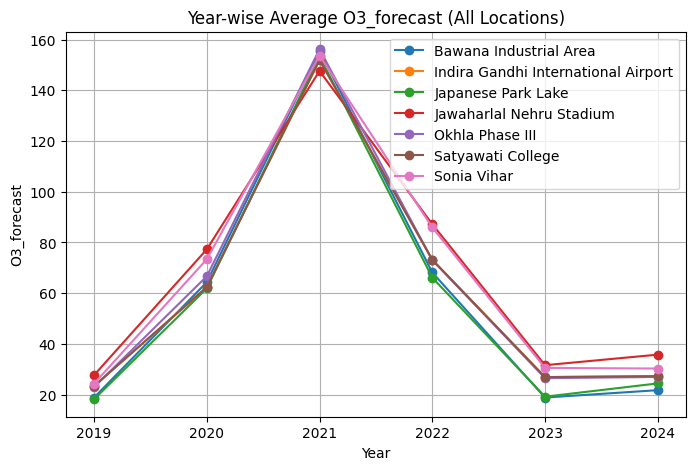

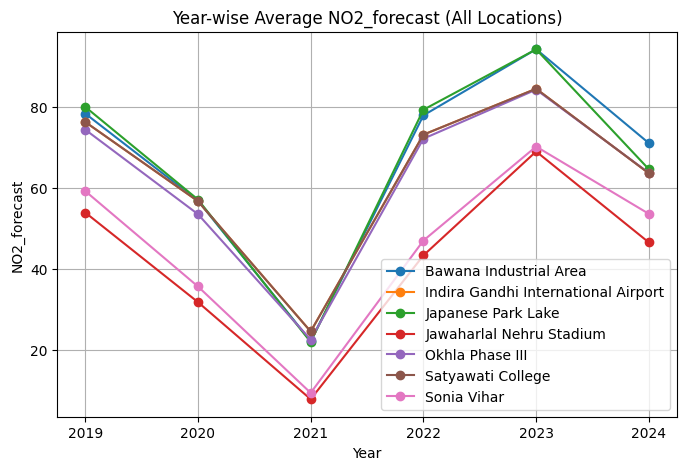

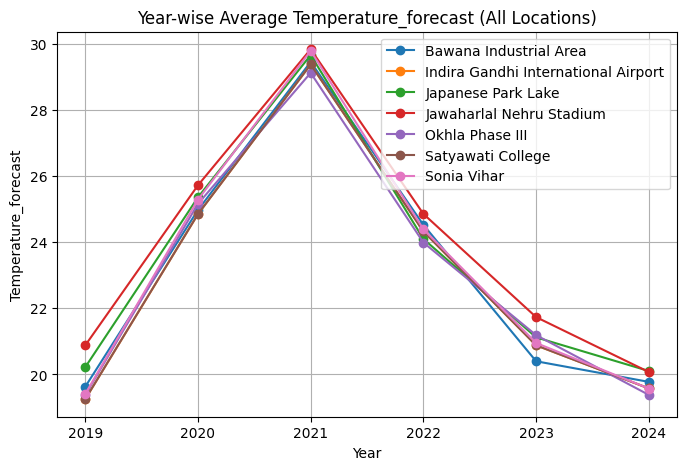

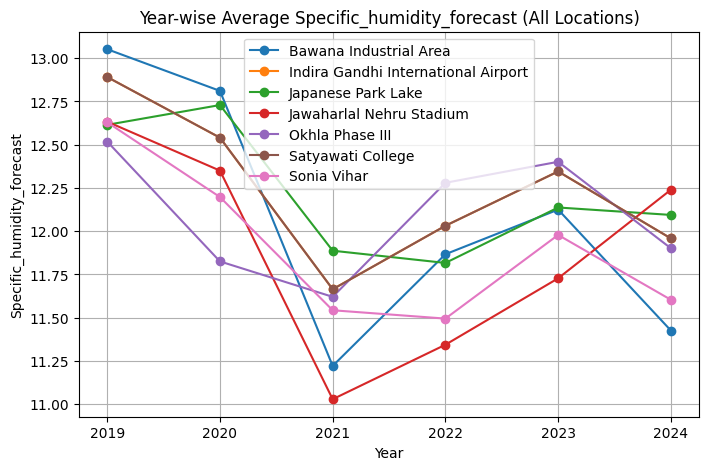

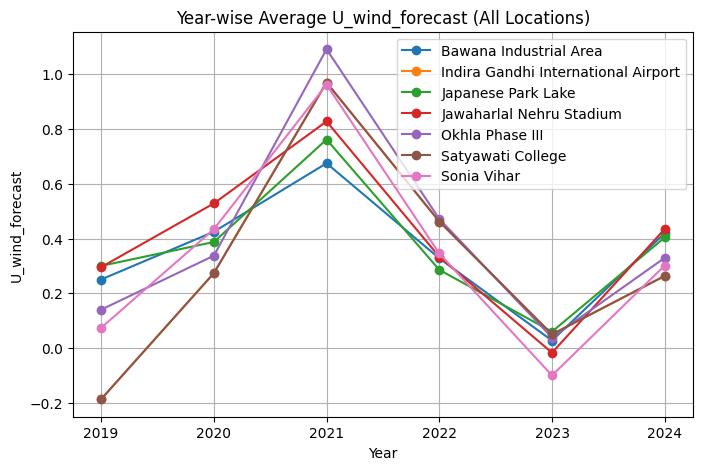

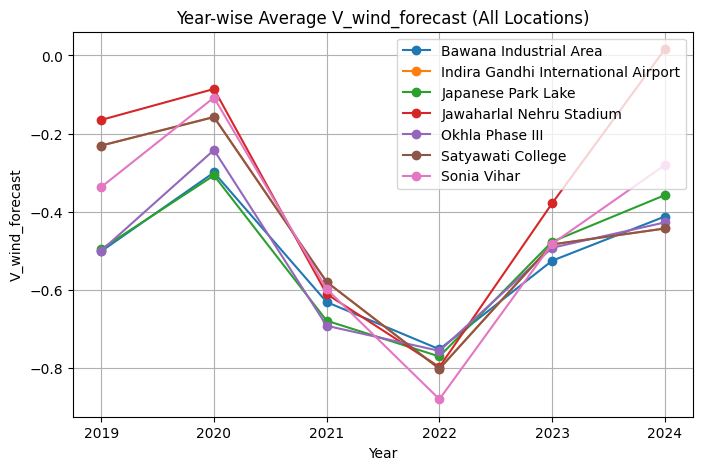

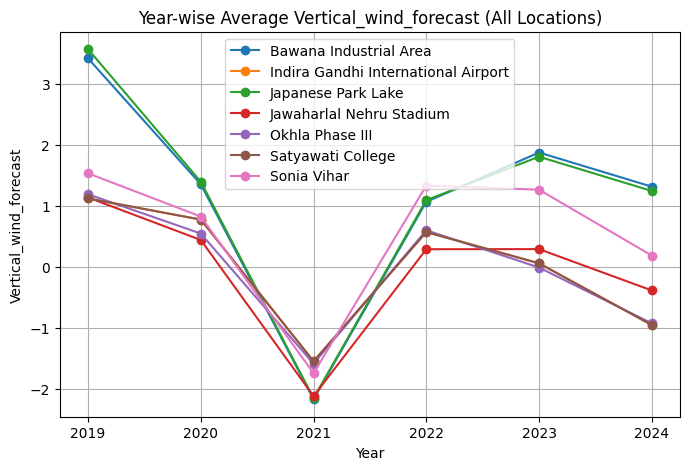

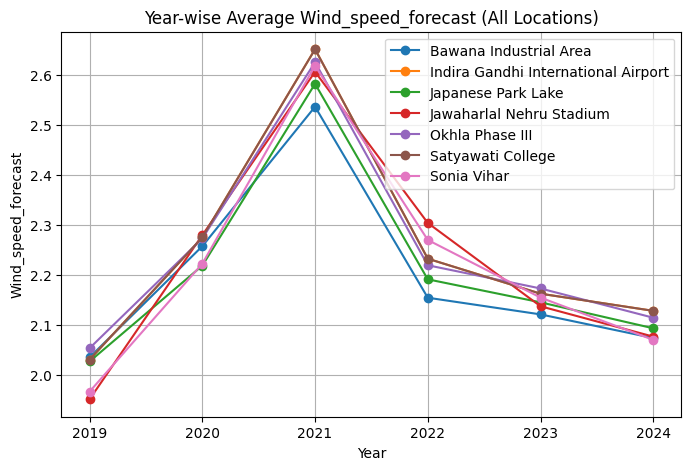

In [14]:
for col in forecast_cols:
    plt.figure(figsize=(8,5))
    
    for loc in yearly_data.index.get_level_values(0).unique():
        loc_data = yearly_data.loc[loc]
        plt.plot(loc_data.index, loc_data[col], marker="o", label=loc)
    
    plt.title(f"Year-wise Average {col} (All Locations)")
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()

### Month-wise Analysis

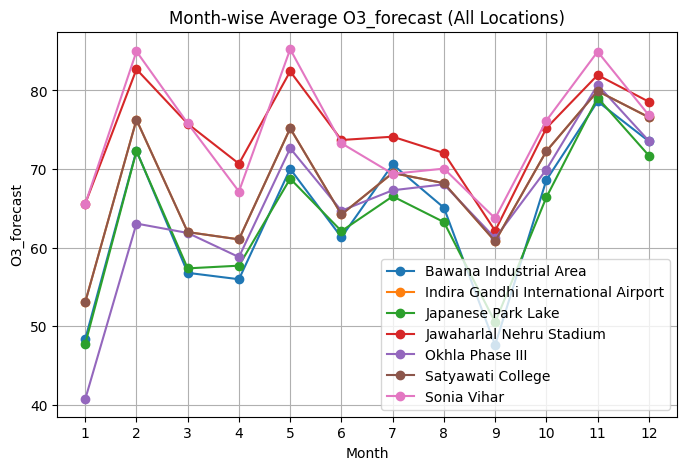

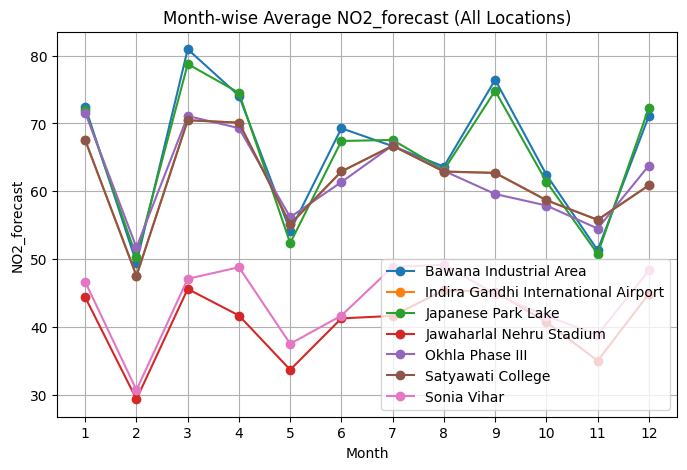

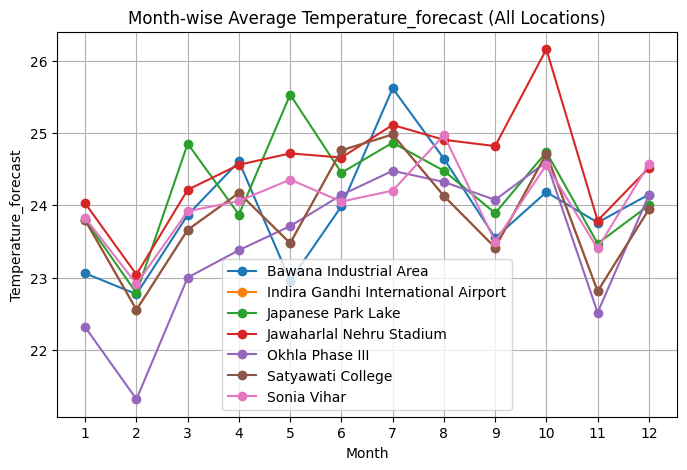

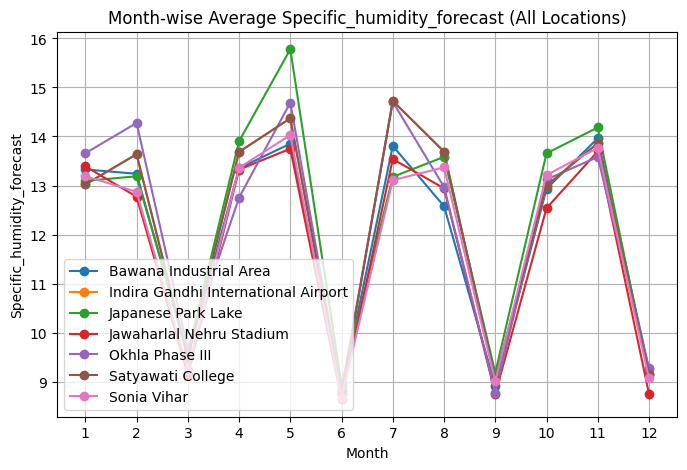

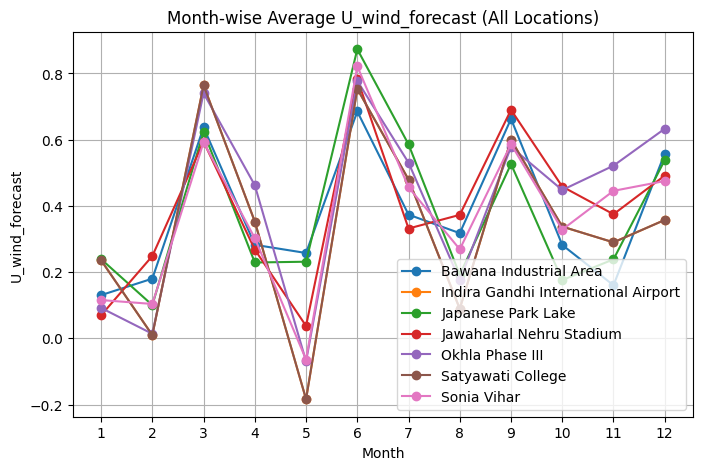

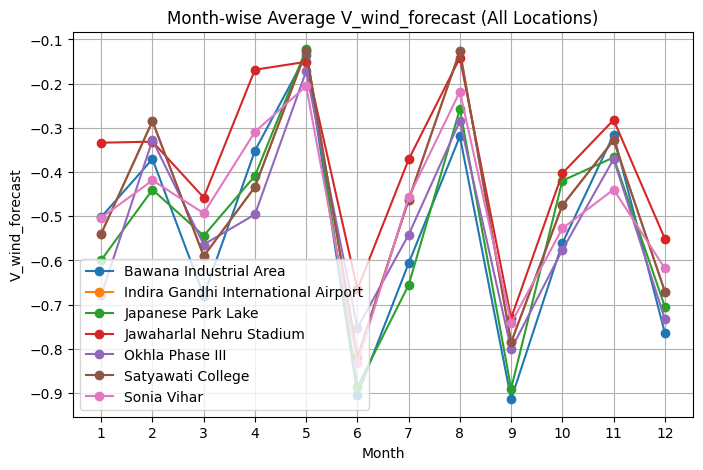

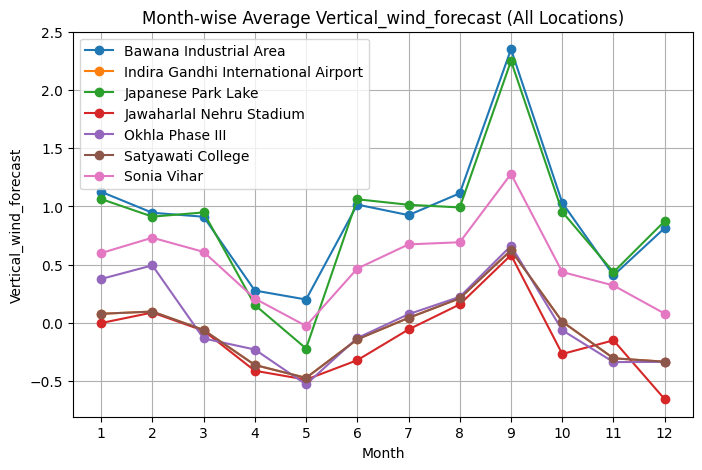

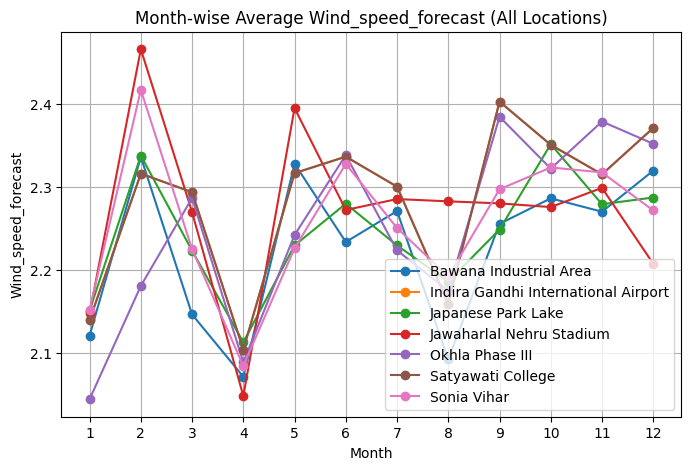

In [15]:
monthly_avg = (monthly_data.groupby(level=["location","month"]).mean())

for col in forecast_cols:
    plt.figure(figsize=(8,5))
    
    for loc in monthly_avg.index.get_level_values(0).unique():
        loc_data = monthly_avg.loc[loc]
        plt.plot(loc_data.index, loc_data[col], marker="o", label=loc)
    
    plt.title(f"Month-wise Average {col} (All Locations)")
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.xticks(range(1,13))
    plt.legend()
    plt.grid(True)
    plt.show()

In [16]:
numeric_cols = df.select_dtypes(include="number").columns

exclude_cols = ["year", "month", "day", "hour"]
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

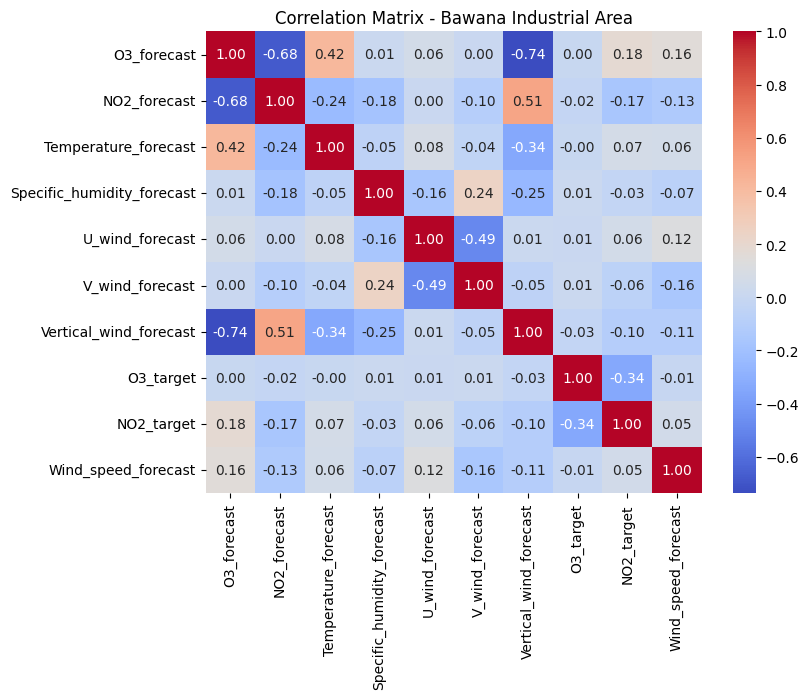

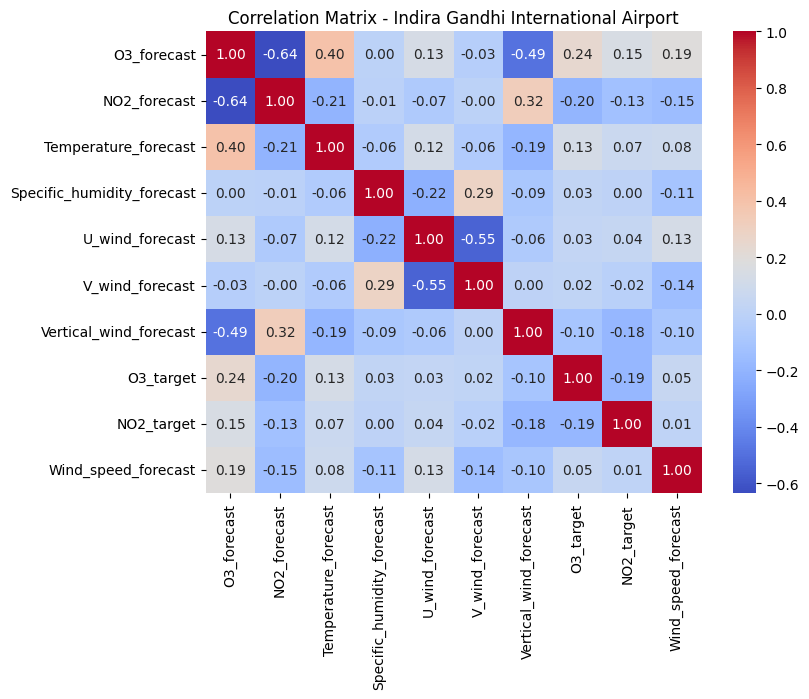

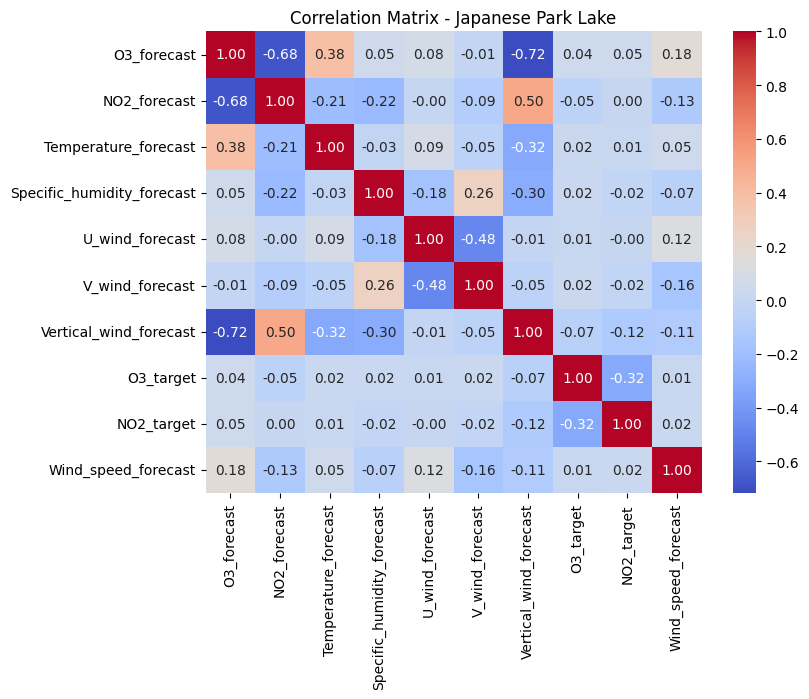

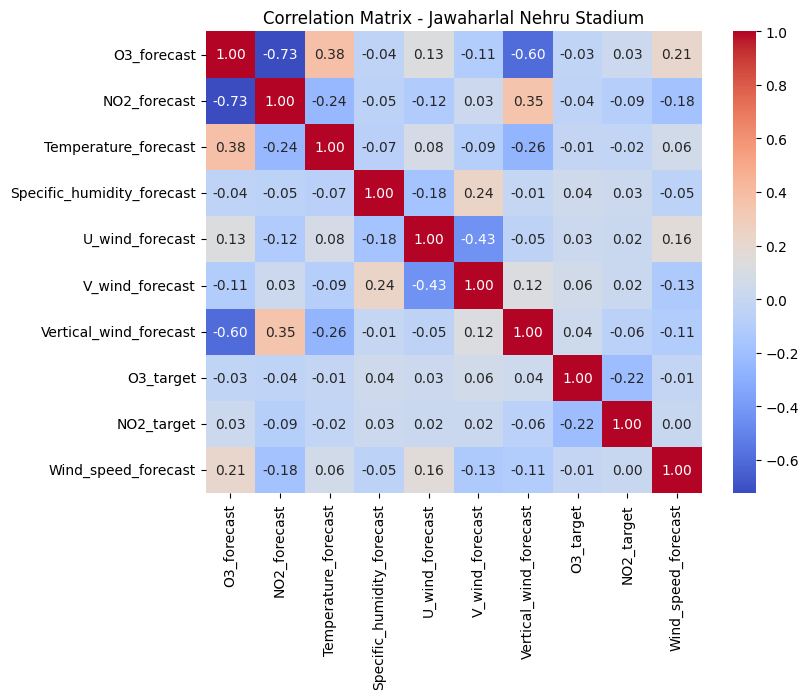

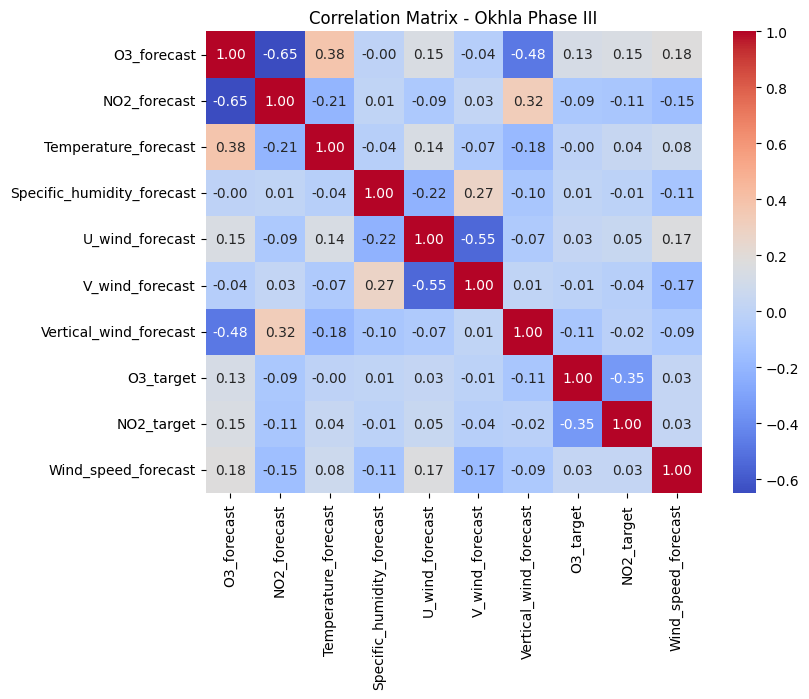

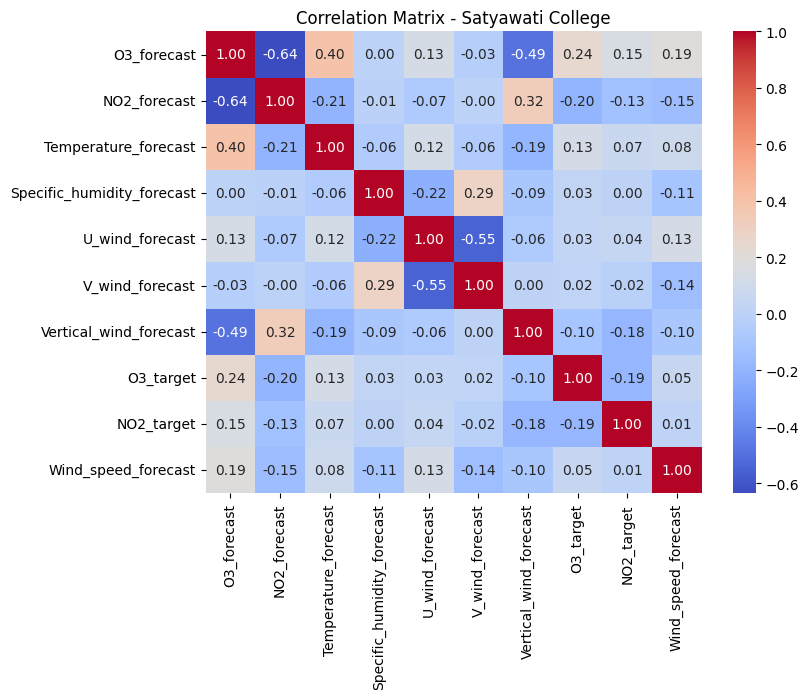

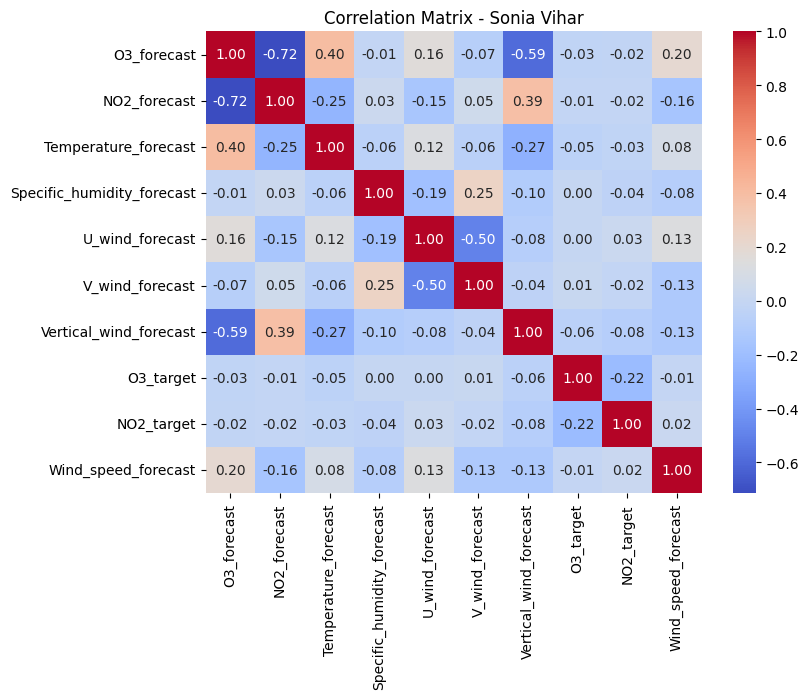

In [17]:
locations = df.index.get_level_values("location").unique()
for loc in locations:
    loc_df = df.xs(loc, level="location")
    
    corr_matrix = loc_df[numeric_cols].corr()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix,
                annot=True,
                cmap="coolwarm",
                fmt=".2f")
    
    plt.title(f"Correlation Matrix - {loc}")
    plt.show()

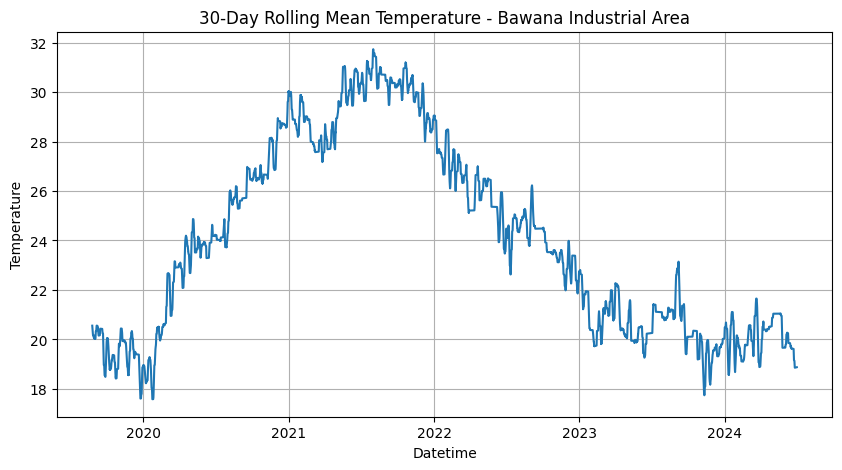

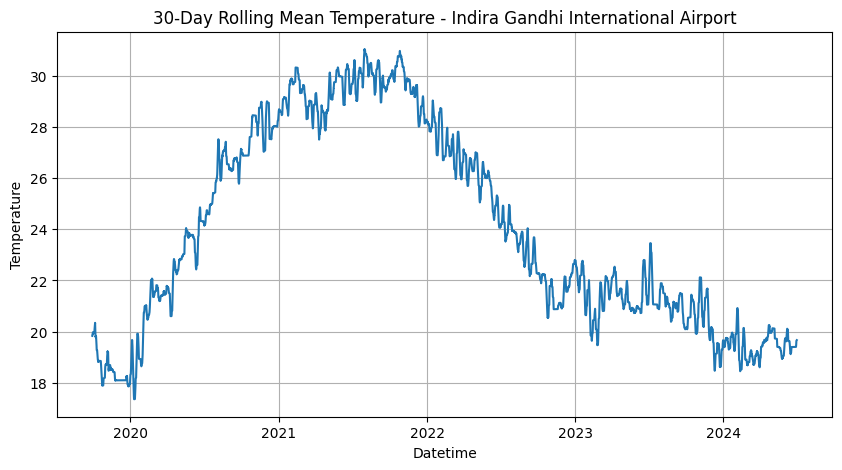

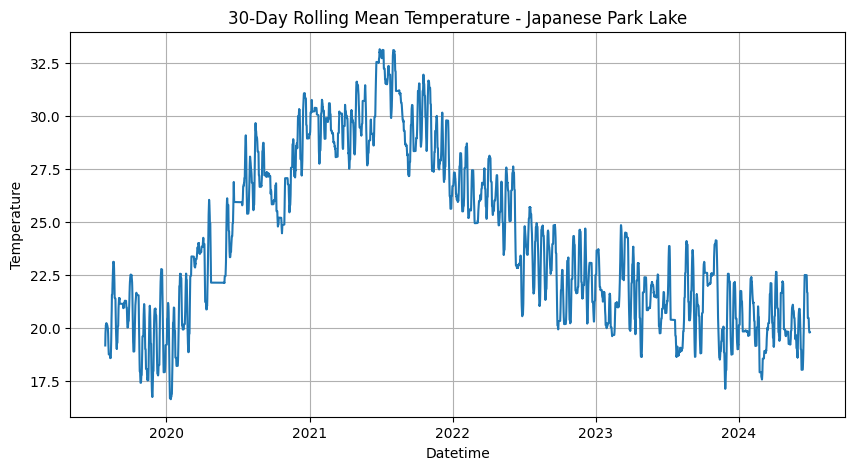

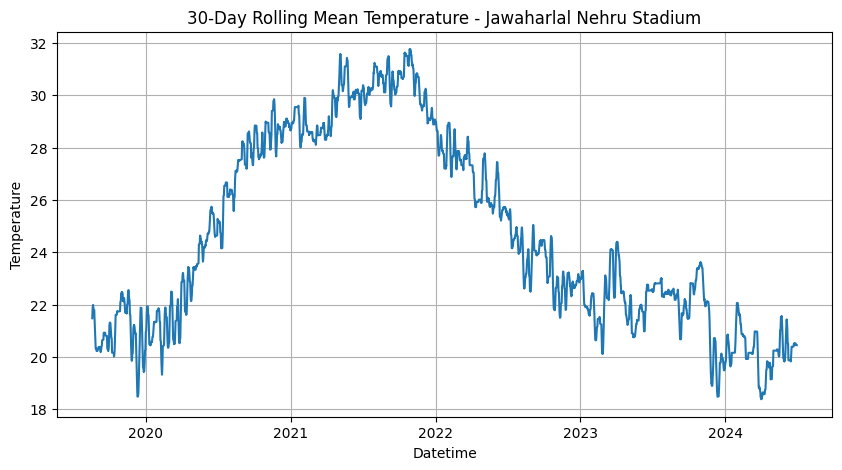

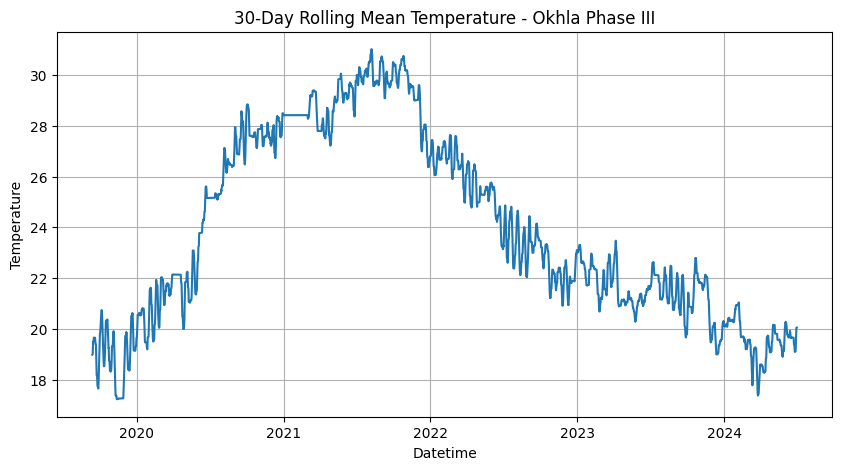

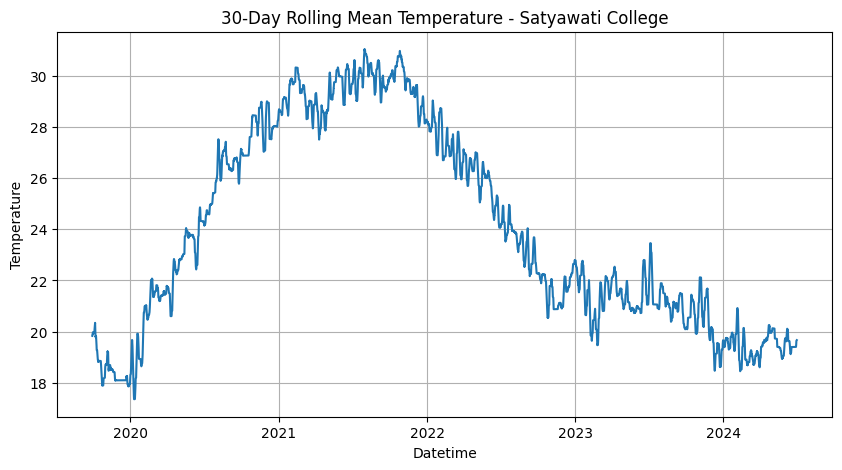

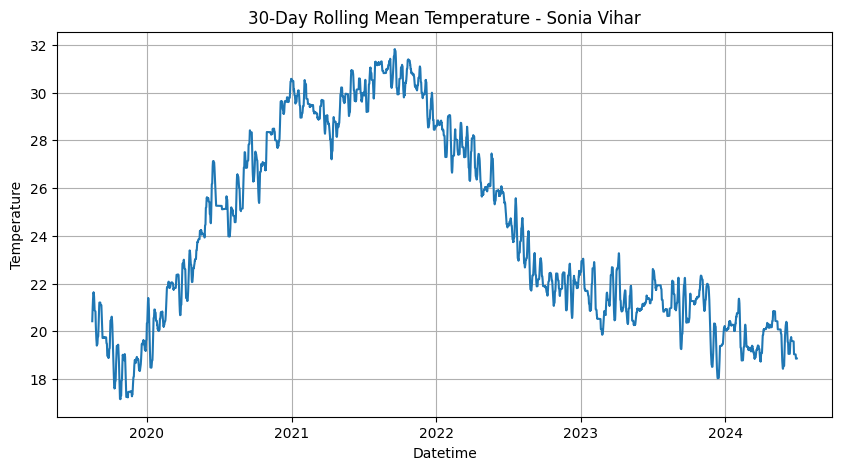

In [18]:
df["rolling_temp_30d"] = (df.groupby(level="location")["Temperature_forecast"].rolling(24*30).mean().reset_index(level=0, drop=True))
locations = df.index.get_level_values("location").unique()

for loc in locations:
    
    loc_df = df.xs(loc, level="location")
    
    plt.figure(figsize=(10,5))
    plt.plot(loc_df.index, loc_df["rolling_temp_30d"])
    
    plt.title(f"30-Day Rolling Mean Temperature - {loc}")
    plt.xlabel("Datetime")
    plt.ylabel("Temperature")
    plt.grid(True)
    plt.show()